In [ ]:
# ========ABRINDO ARQUIVOS DE BFP  

In [1]:
#IMPORTANDO PACOTES 
import cartopy, cartopy.crs as ccrs
import matplotlib.pyplot as plt 
import netCDF4 as nc 
import pandas as pd
import numpy as np
#import utilities
import os 
import import_ipynb 
#import FuncaoProposta1 as fpl
from FuncaoProposta1 import reprojetando_imagens
from utilities import geo2grid

/home/leonardo/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


importing Jupyter notebook from FuncaoProposta1.ipynb


In [2]:
# DADOS GLOBAIS 
colunas  = ['date', 'hour', 'nseg', 'lon', 'lat', 'u', 'v', 'press', 'qi', 'BFP_g', 'BFP_l', 'u_nwp_AMV', 'u_nwp_BFP_g', 'u_nwp_BFP_l', 'v_nwp_AMV', 'v_nwp_BFP_g', 'v_nwp_BFP_l','spd_diff_AMV', 'spd_diff_BFP_g', 'spd_diff_BFP_l', 'vctr_diff_AMV', 'vctr_diff_BFP_g', 'vctr_diff_BFP_l', 'BFP_qc', 'no name']


In [13]:
# PEGANDO CAMINHO BFP DO DIA 01 01 2022 - PC NOTEBOOK

# --- CAMINHOS DOS ARQUIVOS CSV ----
caminho_bfp_ORIG= '/home/leonardo/Área de Trabalho/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA MODELOS ANTIGAS/SAIDA DO MODELO 2022/2022-01-01/1 ORIGINAL/bfp_ERA5_AMV_IR_202201011100_2xnwp.txt_202201011100.txt'
caminho_bfp_press_sat = '/home/leonardo/Área de Trabalho/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA MODELOS ANTIGAS/SAIDA DO MODELO 2022/2022-01-01/2 PRESS SAT/bfp_ERA5_AMV_IR_202201011100_2xnwp.txt_202201011100.txt'
caminho_bfp_05 = '/home/leonardo/Área de Trabalho/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA MODELOS ANTIGAS/SAIDA DO MODELO 2022/2022-01-01/3 05 MEDIA/bfp_ERA5_AMV_IR_202201011100_2xnwp.txt_202201011100.txt'
caminho_bfp_10 = '/home/leonardo/Área de Trabalho/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA MODELOS ANTIGAS/SAIDA DO MODELO 2022/2022-01-01/4 10 MEDIA/bfp_ERA5_AMV_IR_202201011100_2xnwp.txt_202201011100.txt'
caminho_bfp_15 = '/home/leonardo/Área de Trabalho/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA MODELOS ANTIGAS/SAIDA DO MODELO 2022/2022-01-01/5 15 MEDIA/bfp_ERA5_AMV_IR_202201011100_2xnwp.txt_202201011100.txt'
caminho_bfp_20 = '/home/leonardo/Área de Trabalho/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA MODELOS ANTIGAS/SAIDA DO MODELO 2022/2022-01-01/6 MEDIA 20/bfp_ERA5_AMV_IR_202201011100_2xnwp.txt_202201011100.txt'
caminho_bfp_25 = '/home/leonardo/Área de Trabalho/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA MODELOS ANTIGAS/SAIDA DO MODELO 2022/2022-01-01/7 MEDIA 25/bfp_ERA5_AMV_IR_202201011100_2xnwp.txt_202201011100.txt'
caminho_bfp_19x19 = '/home/leonardo/Área de Trabalho/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA MODELOS ANTIGAS/SAIDA DO MODELO 2022/2022-01-01/8 MEDIA PONTO/bfp_ERA5_AMV_IR_202201011100_2xnwp.txt_202201011100.txt'
# ARQUIVO NETCDF - não precisa pois já reprojetei
#caminho_nc = "/home/leonardo/Área de Trabalho/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA DO MODELO/2022-01-01/ARQUIVOS/nc/OR_ABI-L2-CTPF-M6_G16_s20220011100207_e20220011109515_c20220011112597.nc"


caminho_salvar = "/home/leonardo/Área de Trabalho/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA MODELOS ANTIGAS/SAIDA DO MODELO 2022/2022-01-01/9 IMAGENS SATELITES/"

In [3]:
# PEGANDO CAMINHO BFP DO DIA 01 01 2022 -  MINI PC 

# --- CAMINHOS DOS ARQUIVOS CSV ----
caminho_bfp_press_sat = '/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA DO MODELO/2022-01-01/2 PRESS SAT/bfp_ERA5_AMV_IR_202201011100_2xnwp.txt_202201011100.txt'
caminho_bfp_05 = '/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA DO MODELO/2022-01-01/3 05 MEDIA/bfp_ERA5_AMV_IR_202201011100_2xnwp.txt_202201011100.txt'
caminho_bfp_10 = '/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA DO MODELO/2022-01-01/4 10 MEDIA/bfp_ERA5_AMV_IR_202201011100_2xnwp.txt_202201011100.txt'
caminho_bfp_15 = '/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA DO MODELO/2022-01-01/5 15 MEDIA/bfp_ERA5_AMV_IR_202201011100_2xnwp.txt_202201011100.txt'
caminho_bfp_20 = '/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA DO MODELO/2022-01-01/6 MEDIA 20/bfp_ERA5_AMV_IR_202201011100_2xnwp.txt_202201011100.txt'
caminho_bfp_25 = '/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA DO MODELO/2022-01-01/7 MEDIA 25/bfp_ERA5_AMV_IR_202201011100_2xnwp.txt_202201011100.txt'
caminho_bfp_19x19 = '/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA DO MODELO/2022-01-01/8 MEDIA PONTO/bfp_ERA5_AMV_IR_202201011100_2xnwp.txt_202201011100.txt'
# ARQUIVO NETCDF
caminho_nc = "/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/SAIDA DO MODELO/2022-01-01/ARQUIVOS/nc/OR_ABI-L2-CTPF-M6_G16_s20220011100207_e20220011109515_c20220011112597.nc"


In [14]:
# ABRINDO OS ARQUIVOS
dado_bfp_ORIG = pd.read_csv(caminho_bfp_ORIG, sep = ' ', header = 0)
dado_bfp_press_sat = pd.read_csv(caminho_bfp_press_sat, sep = ' ', header = 0)
dado_bfp_05 = pd.read_csv(caminho_bfp_05, sep = ' ', header = 0)
dado_bfp_10 = pd.read_csv(caminho_bfp_10, sep = ' ', header = 0)
dado_bfp_15 = pd.read_csv(caminho_bfp_15, sep = ' ', header = 0)
dado_bfp_20 = pd.read_csv(caminho_bfp_20, sep = ' ', header = 0)
dado_bfp_25 = pd.read_csv(caminho_bfp_25, sep = ' ', header = 0)
dado_bfp_19x19 = pd.read_csv(caminho_bfp_19x19, sep = ' ', header = 0)
# ------------------
dado_bfp_ORIG.columns = colunas
dado_bfp_press_sat.columns = colunas
dado_bfp_05.columns = colunas
dado_bfp_10.columns = colunas
dado_bfp_15.columns = colunas
dado_bfp_20.columns = colunas
dado_bfp_25.columns = colunas
dado_bfp_19x19.columns = colunas

# -----------------------------------------------------
# ABRINDO NC 
#nc1 = nc.Dataset(caminho_nc)

# RECORTANDO POR LAT E LON 
extent = [-120,-69.93,-10.01,25]

# RECORTANDO IMAGEM NETCDF ORIGINAL - NAO É NECESSARIO 
# lly, llx = utilities.geo2grid(extent[1], extent[0], nc1)
# ury, urx = utilities.geo2grid(extent[3], extent[2], nc1)
##DEFININDO OS PARAMETROS E CHAMANDO ARQUIVO COM O 'RECORTE" DEFINIDO
# PRES = nc1.variables['PRES'][ury:lly, llx:urx]

In [6]:
# SEPARANDO POR ALTURA E PLOTANDO 
#PRES[PRES < 750]  = np.nan
#PRES[PRES < 800]  = np.nan

# plt.imshow(PRES)
# plt.colorbar()

In [21]:
# SEPARANDO ALTURA DESEJADA 
valor_min = 750
valor_max = 850
#dado_bfp = dado_bfp[(dado_bfp['press']>= 750) & dado_bfp['press']<= 800 ]
dado_bfp_ORIG = dado_bfp_ORIG[(dado_bfp_ORIG['press'] >= valor_min) & (dado_bfp_ORIG['press']<= valor_max)]
dado_bfp_press_sat = dado_bfp_press_sat[(dado_bfp_press_sat['press'] >= valor_min) & (dado_bfp_press_sat['press'] <= valor_max)]
dado_bfp_05 = dado_bfp_05[(dado_bfp_05['press'] >= valor_min) & (dado_bfp_05['press']<= valor_max)]
dado_bfp_10 = dado_bfp_10[(dado_bfp_10['press'] >= valor_min) & (dado_bfp_10['press']<= valor_max)]
dado_bfp_15 = dado_bfp_15[(dado_bfp_15['press'] >= valor_min) & (dado_bfp_15['press']<= valor_max)]
dado_bfp_20 = dado_bfp_20[(dado_bfp_20['press'] >= valor_min) & (dado_bfp_20['press']<= valor_max)]
dado_bfp_25 = dado_bfp_25[(dado_bfp_25['press'] >= valor_min) & (dado_bfp_25['press']<= valor_max)]
dado_bfp_19x19 = dado_bfp_19x19[(dado_bfp_19x19['press'] >= valor_min) & (dado_bfp_19x19['press']<= valor_max)]

#dado_bfp_press_sat.head()


In [ ]:
# REALIZANDO PLOT DE BARBELAS SOBRE A IMAGEM DO SATELITE IMAGEM ORIGINAL ---- NAO PRECISA 
fig, ax = plt.subplots( nrows = 1, ncols = 1,sharex = True, sharey = True, figsize = (15,15), subplot_kw={'projection': ccrs.PlateCarree()})

#  NUVENS

img = ax.imshow(PRES, cmap= "Greys",vmin = 0, vmax = 1000, extent = [-121,-10,-50, 15], 
                transform = ccrs.PlateCarree(), alpha = 0.4)
#plt.scatter(dado_bfp['lon'],dado_bfp['lat'], c = dado_bfp['press'], cmap = "Greys", alpha= 0.2)
q = ax.quiver(dado_bfp_press_sat['lon'], dado_bfp_press_sat['lat'], dado_bfp_press_sat['u'],dado_bfp_press_sat['v'], scale= 700,  
               pivot = "middle", alpha=0.5,
               width = 0.0015, color =  "red"  )

cbar = fig.colorbar(img, ax= ax, label = 'PRESSAO (hpa)', orientation = 'horizontal',
                    pad = 0.05, fraction= 0.05)
ax.set_title(f'BARBELA x IMAGEM GOES ',fontweight = 'bold', fontsize = 12, loc = 'center')
#plt.colorbar(q, label = " ??", extend = "both", orientation = 'vertical' ,pad = 0.05, fraction= 0.05,
#             ax= ax)
ax.set_extent([-121,-10,-50, 15])  #[0,-130,-80, 20]
ax.add_feature(cartopy.feature.COASTLINE, color = 'black', linewidth = 0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor = 'black', linewidth = 0.8)
    # salvando arquivo 
# plt.savefig(f'{caminho_salvar}{nome_figura}_{nomenclatura}.jpeg', bbox_inches = 'tight')
# print('Plot salvo : ', caminho_salvar)


In [9]:
# ABRINDO ARQUIVO NC E REPROJETANDO - SÓ PRECISA FAZER UMA VEZ.. 
# caminho_reproj = '/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/nc_já extraido/reprojetada/'
# 
# filename = reprojetando_imagens(caminho_nc, caminho_reproj, var = 'PRES', my_extent= extent)
# 

Pronto a reprojeçao do arquivo, salvo em 
  /home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/nc_já extraido/reprojetada//OR_ABI-L2-CTPF-M6_G16_s20220011100207_e20220011109515_c20220011112597.nc_ret.nc


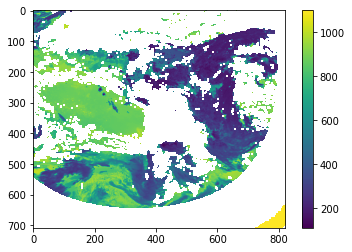

In [30]:
#ABRINDO ARQUIVO NC REPROJETADO 

nc_rep = '/home/leonardo/Área de Trabalho/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/nc_já extraido/reprojetada/OR_ABI-L2-CTPF-M6_G16_s20220011100207_e20220011109515_c20220011112597.nc_ret.nc'
#nc_rep = '/home/vlsantos/MEGA/SCRIPTS PYTHON/SCRIPTS PYTHON/Projetos-python/AMVS/DADOS/REPROJ E EXTRA/nc_já extraido/reprojetada//OR_ABI-L2-CTPF-M6_G16_s20220011100207_e20220011109515_c20220011112597.nc_ret.nc'
rep  = nc.Dataset(nc_rep)
PRES_REP = rep.variables['Band1'][:]

plt.imshow(PRES_REP)
plt.colorbar()

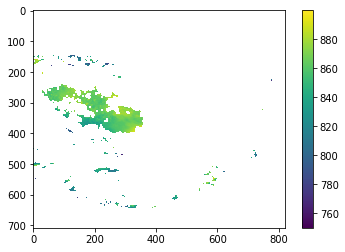

In [31]:
# SELECIONANDO SÓ PRESSAO MAIS BAIXA QUE 750
PRES_REP[PRES_REP < 750] = np.nan
PRES_REP[PRES_REP > 900] = np.nan

plt.imshow(PRES_REP)
plt.colorbar()

In [18]:
# FUNCAO PLOT

def funcao_plot(dado_bfp,PRES_REP, vmin, vmax, nome_var, caminho_salvar):
# REALIZANDO PLOT DE BARBELAS SOBRE A IMAGEM DO SATELITE REPROJETADA --- MEDIA 19X19
    fig, ax = plt.subplots( nrows = 1, ncols = 1,sharex = True, sharey = True, figsize = (15,15), subplot_kw={'projection': ccrs.PlateCarree()})
    
    #  NUVENS        -----    "Greys"
    img = ax.imshow(PRES_REP, cmap= "viridis",vmin = 700, vmax = 900, extent = [-121,-10,-50, 15], 
                    transform = ccrs.PlateCarree(), alpha = 0.4)
    #plt.scatter(dado_bfp['lon'],dado_bfp['lat'], c = dado_bfp['press'], cmap = "Greys", alpha= 0.2)
    q = ax.quiver(dado_bfp['lon'], dado_bfp['lat'], dado_bfp['u'],dado_bfp['v'], scale= 700,  
                   pivot = "middle", alpha=0.5,
                   width = 0.0015, color =  "red"  )
    
    cbar = fig.colorbar(img, ax= ax, label = 'PRESSAO (hpa)', orientation = 'horizontal',
                        pad = 0.05, fraction= 0.05)
    DATA = dado_bfp['date'].iloc[0]
    HORA = dado_bfp['hour'].iloc[0]
    ax.set_title(f'{nome_var}',fontweight = 'bold', fontsize = 12, loc = 'center')
    ax.set_title(f'{DATA}-{HORA}',fontweight = 'bold', fontsize = 12, loc = 'right')
    #plt.colorbar(q, label = " ??", extend = "both", orientation = 'vertical' ,pad = 0.05, fraction= 0.05,
    #             ax= ax)
    ax.set_extent([-121,-10,-50, 15])  #[0,-130,-80, 20]
    ax.add_feature(cartopy.feature.COASTLINE, color = 'black', linewidth = 0.8)
    ax.add_feature(cartopy.feature.BORDERS, edgecolor = 'black', linewidth = 0.8)
    
    # TESTANDO PONTO
    plt.scatter(-53.8008,-29.6914, color = 'blue')
    # salvando arquivo 
    plt.savefig(f'{caminho_salvar}{DATA}_{HORA}_{vmin}-{vmax}_hpa_{nome_var}.jpeg', bbox_inches = 'tight')
# print('Plot salvo : ', caminho_salvar)


/home/leonardo/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/leonardo/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/leonardo/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/leonardo/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/leonardo/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has

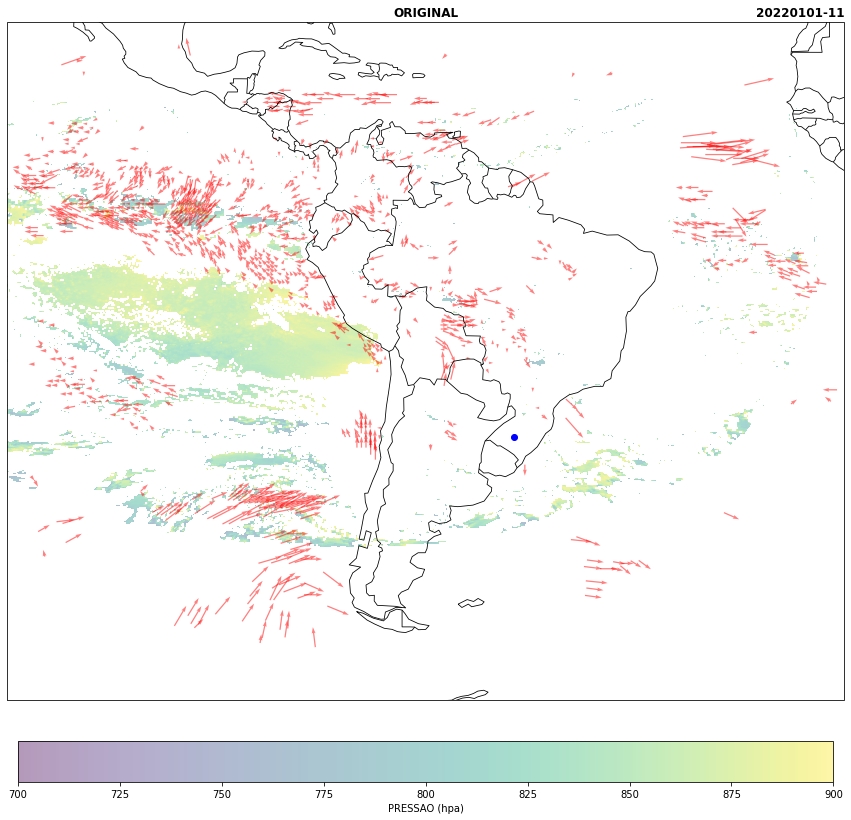

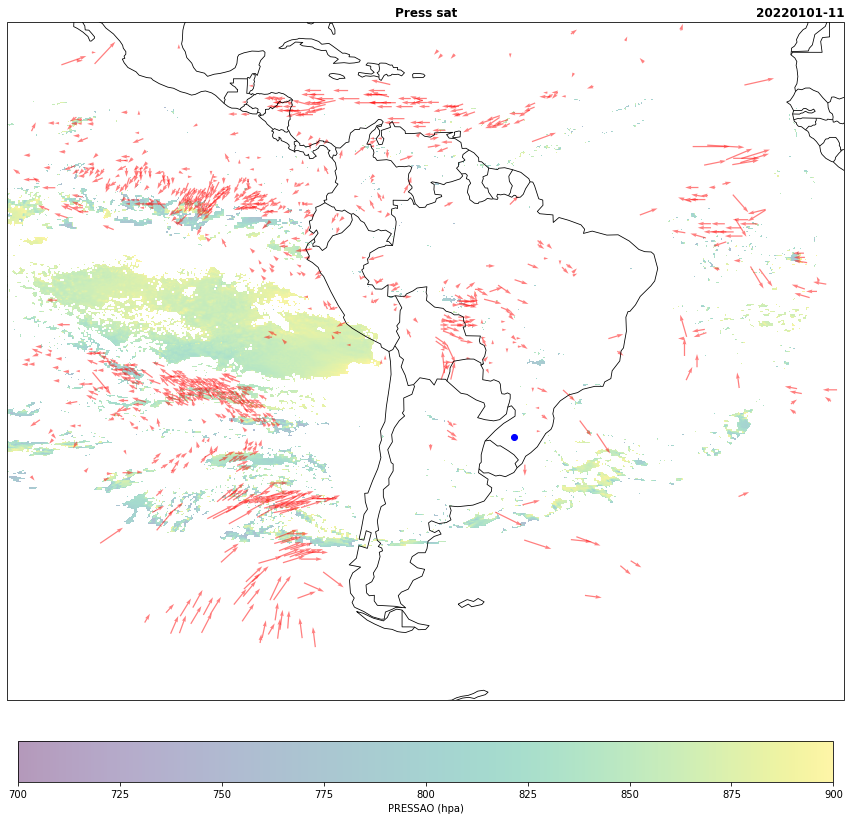

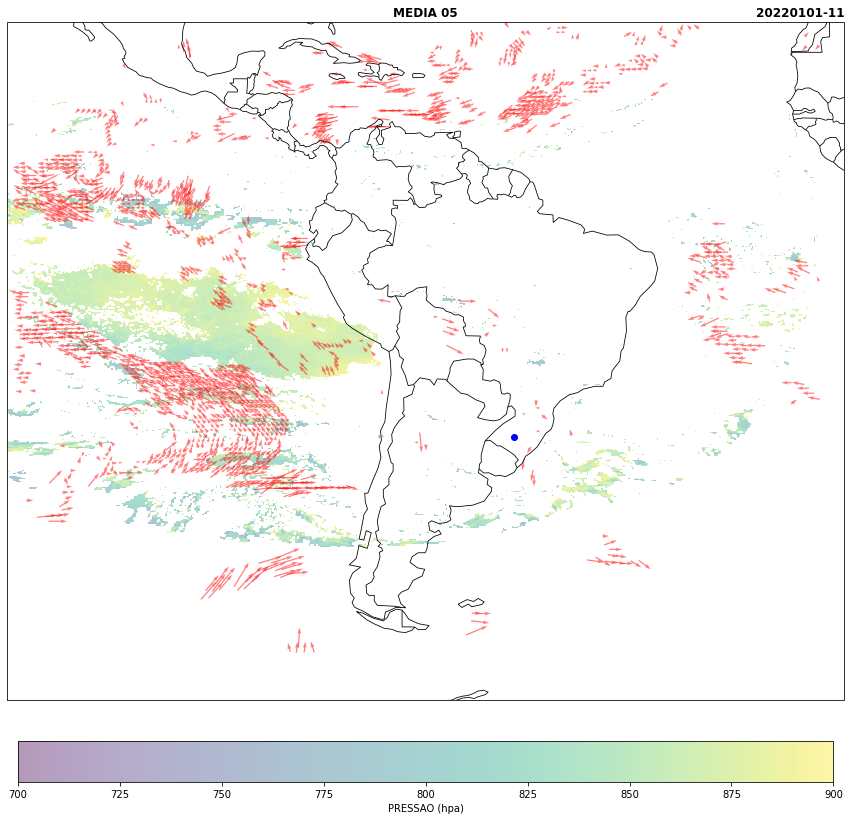

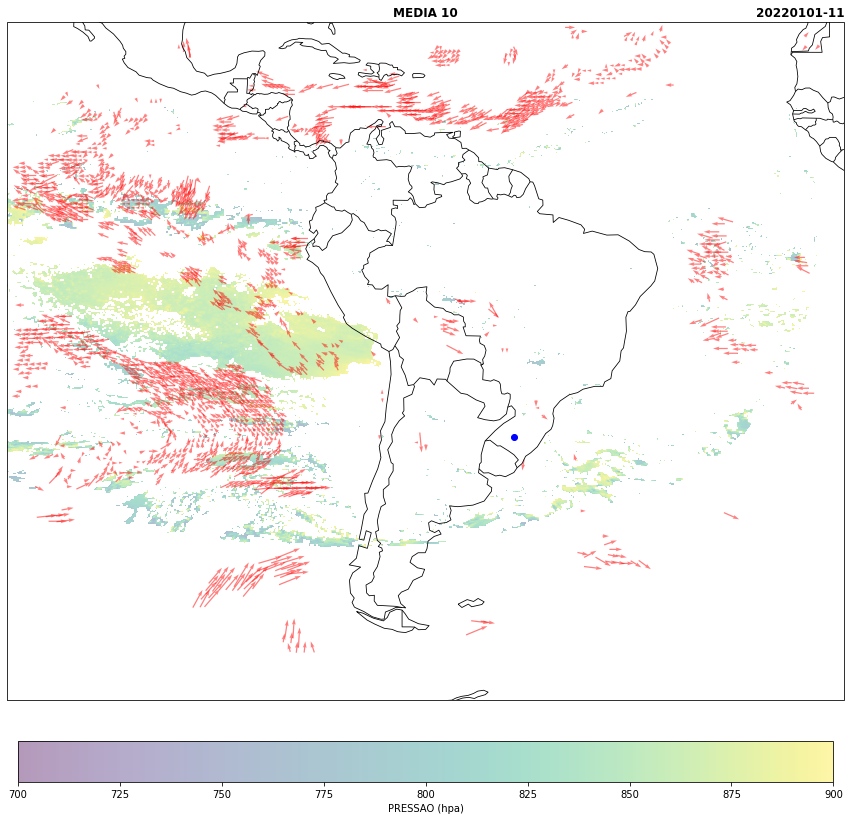

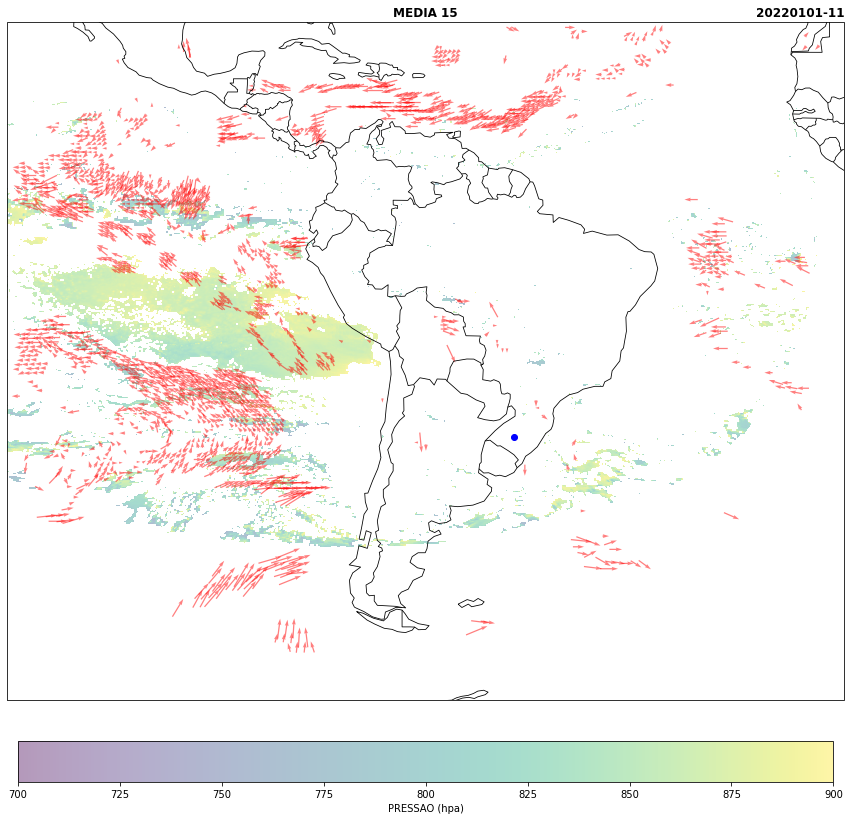

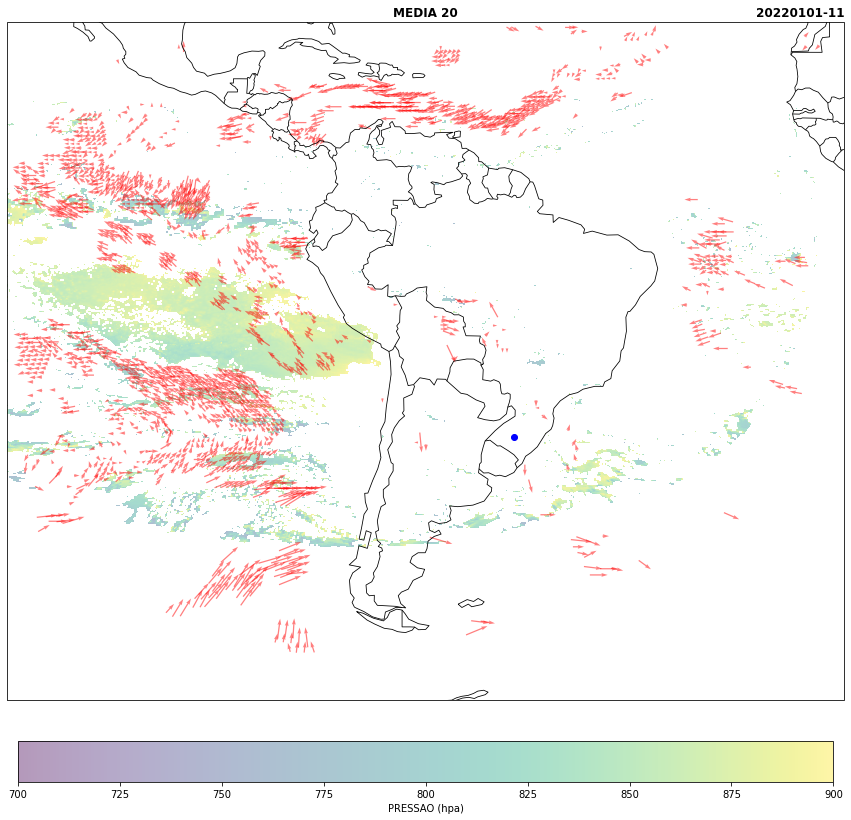

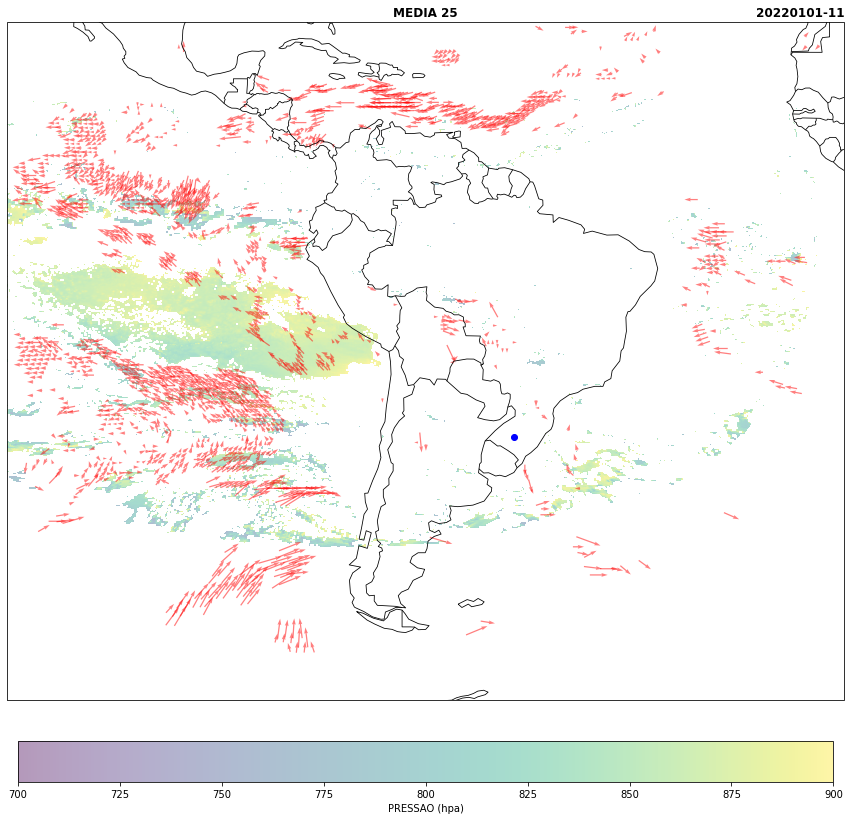

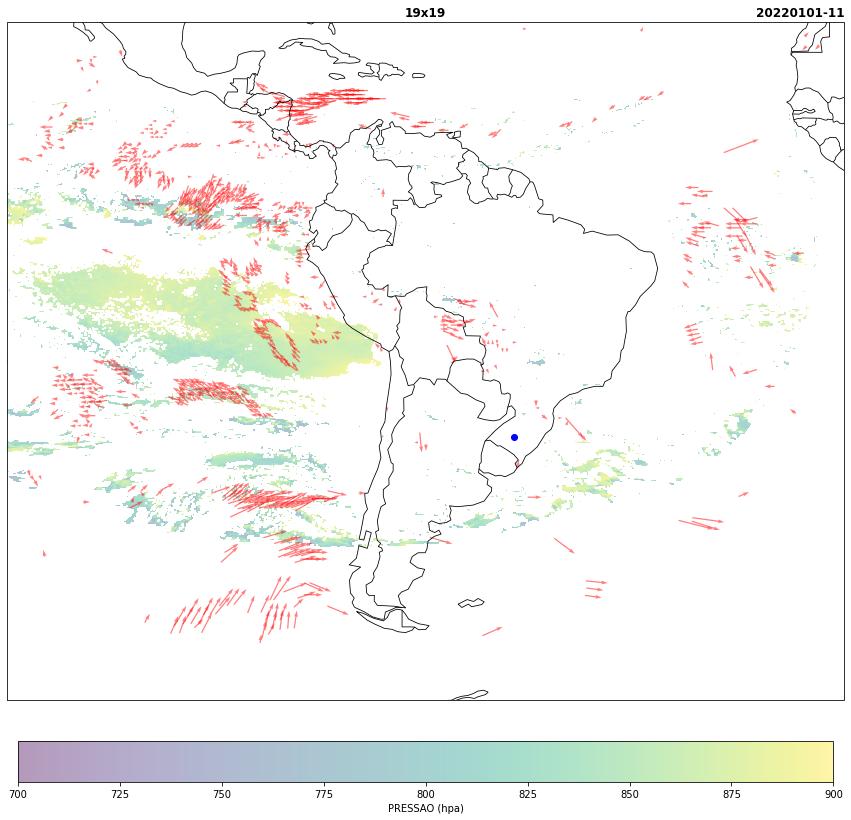

In [32]:
#PLOTANDO ORIGINAL
val_min = 750
val_max = 900

funcao_plot(dado_bfp = dado_bfp_ORIG, PRES_REP= PRES_REP, vmin= val_min, vmax= val_max, nome_var="ORIGINAL", caminho_salvar=caminho_salvar )
#PLOTANDO PRESS SAT
funcao_plot(dado_bfp = dado_bfp_press_sat, PRES_REP= PRES_REP, vmin= val_min, vmax= val_max, nome_var="Press sat", caminho_salvar=caminho_salvar )
#PLOTANDO MEDIA 05
funcao_plot(dado_bfp = dado_bfp_05, PRES_REP= PRES_REP, vmin= val_min, vmax= val_max, nome_var="MEDIA 05", caminho_salvar=caminho_salvar )
#PLOTANDO MEDIA 10
funcao_plot(dado_bfp = dado_bfp_10, PRES_REP= PRES_REP, vmin= val_min, vmax= val_max, nome_var="MEDIA 10", caminho_salvar=caminho_salvar )
#PLOTANDO MEDIA 15
funcao_plot(dado_bfp = dado_bfp_15, PRES_REP= PRES_REP, vmin= val_min, vmax= val_max, nome_var="MEDIA 15", caminho_salvar=caminho_salvar )
#PLOTANDO MEDIA 20
funcao_plot(dado_bfp = dado_bfp_20, PRES_REP= PRES_REP, vmin= val_min, vmax= val_max, nome_var="MEDIA 20", caminho_salvar=caminho_salvar )
#PLOTANDO MEDIA 25
funcao_plot(dado_bfp = dado_bfp_25, PRES_REP= PRES_REP, vmin= val_min, vmax= val_max, nome_var="MEDIA 25", caminho_salvar=caminho_salvar )
#PLOTANDO  PRESS MEDIA 19x19
funcao_plot(dado_bfp = dado_bfp_19x19, PRES_REP= PRES_REP, vmin= val_min, vmax= val_max, nome_var="19x19", caminho_salvar=caminho_salvar )

/home/leonardo/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/leonardo/.local/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


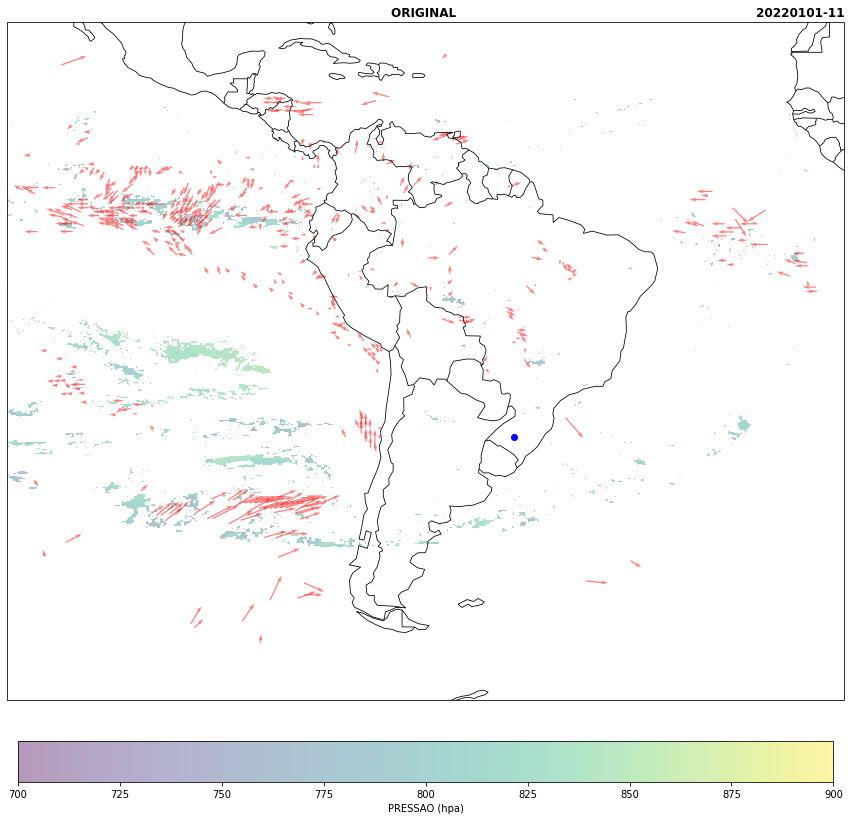

In [27]:
# REALIZANDO PLOT DE BARBELAS SOBRE A IMAGEM DO SATELITE REPROJETADA -- VERSAO BETA 
# USANDO PRESS_SAT
fig, ax = plt.subplots( nrows = 1, ncols = 1,sharex = True, sharey = True, figsize = (15,15), subplot_kw={'projection': ccrs.PlateCarree()})

#  NUVENS        -----    "Greys"
img = ax.imshow(PRES_REP, cmap= "viridis",vmin = 700, vmax = 900, extent = [-121,-10,-50, 15], 
                transform = ccrs.PlateCarree(), alpha = 0.4)
#plt.scatter(dado_bfp['lon'],dado_bfp['lat'], c = dado_bfp['press'], cmap = "Greys", alpha= 0.2)
q = ax.quiver(dado_bfp_ORIG['lon'], dado_bfp_ORIG['lat'], dado_bfp_ORIG['u'],dado_bfp_ORIG['v'], scale= 700,  
               pivot = "middle", alpha=0.5,
               width = 0.0015, color =  "red" )

cbar = fig.colorbar(img, ax= ax, label = 'PRESSAO (hpa)', orientation = 'horizontal',
                    pad = 0.05, fraction= 0.05)
DATA = dado_bfp_ORIG['date'].iloc[0]
HORA = dado_bfp_ORIG['hour'].iloc[0]
ax.set_title(f'ORIGINAL ',fontweight = 'bold', fontsize = 12, loc = 'center')
ax.set_title(f'{DATA}-{HORA}',fontweight = 'bold', fontsize = 12, loc = 'right')
#plt.colorbar(q, label = " ??", extend = "both", orientation = 'vertical' ,pad = 0.05, fraction= 0.05,
#             ax= ax)
ax.set_extent([-121,-10,-50, 15])  #[0,-130,-80, 20]
ax.add_feature(cartopy.feature.COASTLINE, color = 'black', linewidth = 0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor = 'black', linewidth = 0.8)
  
  
# TESTANDO PONTO
plt.scatter(-53.8008,-29.6914, color = 'blue')
# salvando arquivo 
plt.savefig(f'{caminho_salvar}{DATA}_{HORA}_ORIG.jpeg', bbox_inches = 'tight')
# print('Plot salvo : ', caminho_salvar)
